In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





##Загружаем таблицу из файла:

In [81]:

data = pd.read_csv('file.csv', sep = ',')
data['Dates'] = data['Dates'].astype('datetime64')
data.columns = (['Date','CM','DSI','CM_top','CM_bottom','Vol_pos','Vol_neg','Opt_vol','Price'])
data['Days'] = data['Date'].apply(lambda x: int(str(x - pd.to_datetime('2021-03-31')).split(' ')[0])) #день по счету
data['Days_of_month'] = data['Date'].dt.day #день в месяце
data

,Date,CM,DSI,CM_top,CM_bottom,Vol_pos,Vol_neg,Opt_vol,Price,Days,Days_of_month
0,2021-04-01,267.569262,39.503498,249.455179,203.658869,1.038873e+07,-5.867719e+06,1.692419e+07,252.960007,1,1
1,2021-04-05,266.446103,43.547849,249.455179,203.658869,1.038873e+07,-5.867719e+06,1.745595e+07,259.359985,5,5
2,2021-04-06,266.097440,59.864450,271.936465,213.215830,1.671536e+07,-1.343049e+06,2.350778e+07,255.169998,6,6
3,2021-04-07,265.693929,60.485745,270.586292,214.080616,1.713731e+07,-1.354932e+06,2.321486e+07,252.580002,7,7
4,2021-04-08,262.822885,58.596604,269.124498,215.351014,2.174643e+07,-1.297189e+06,2.108926e+07,254.949997,8,8
...,...,...,...,...,...,...,...,...,...,...,...
215,2022-02-07,212.710125,38.927060,228.921228,185.323365,6.149636e+06,-5.498856e+06,2.255289e+06,211.919998,313,7
216,2022-02-08,213.786000,42.397217,227.853864,188.106296,5.716552e+06,-5.293135e+06,6.499478e+06,213.270004,314,8
217,2022-02-09,216.506222,35.989526,225.033262,188.876472,8.407428e+06,-4.347041e+06,1.097796e+07,215.860001,315,9
218,2022-02-10,220.189506,33.404090,222.324677,189.790688,1.138441e+07,-4.051115e+06,1.290490e+07,218.750000,316,10


In [155]:
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           220 non-null    datetime64[ns]
 1   CM             220 non-null    float64       
 2   DSI            220 non-null    float64       
 3   CM_top         220 non-null    float64       
 4   CM_bottom      220 non-null    float64       
 5   Vol_pos        220 non-null    float64       
 6   Vol_neg        220 non-null    float64       
 7   Opt_vol        220 non-null    float64       
 8   Price          220 non-null    float64       
 9   Days           220 non-null    int64         
 10  Days_of_month  220 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 19.0 KB


##Строим корреляционную матрицу:

C:\Users\QWERTY\AppData\Local\Temp\ipykernel_19328\3080654462.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.drop(columns={'Days', 'Days_of_month'}).corr(), dtype=np.bool))


Text(0.5, 1.0, 'Тепловая карта коэффициента корреляций признаков (прим. 0.5 - 50%)')

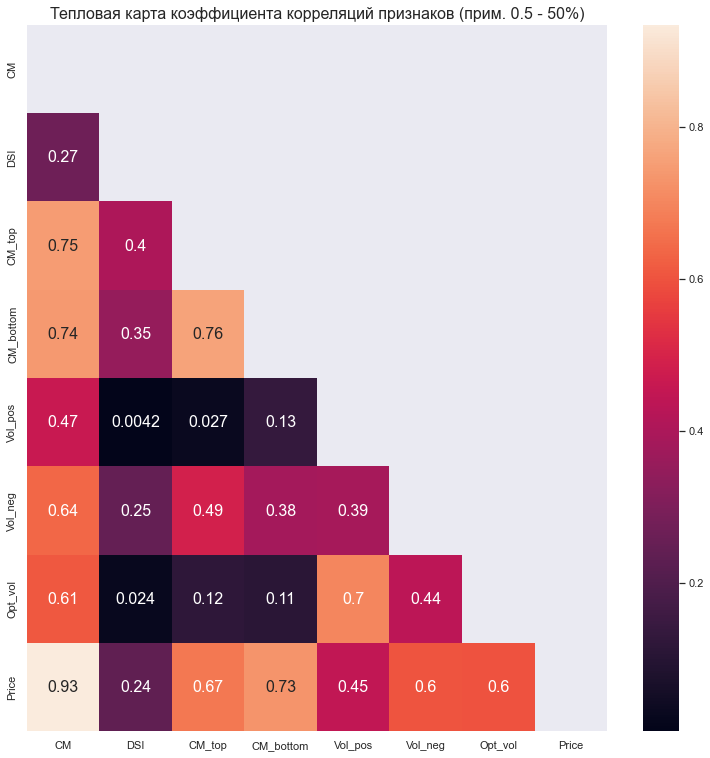

In [158]:
sns.set(rc={'figure.figsize':(13,13)})
mask = np.triu(np.ones_like(data.drop(columns={'Days', 'Days_of_month'}).corr(), dtype=np.bool))
heatmap = sns.heatmap(data.drop(columns={'Days', 'Days_of_month'}).corr(),annot=True, mask = mask, annot_kws={'size':16})
heatmap.set_title('Тепловая карта коэффициента корреляций признаков (прим. 0.5 - 50%)', size=16)



##Как ведут себя показатели Price, CM, CM_top, CM_bottom в течении всех дней:

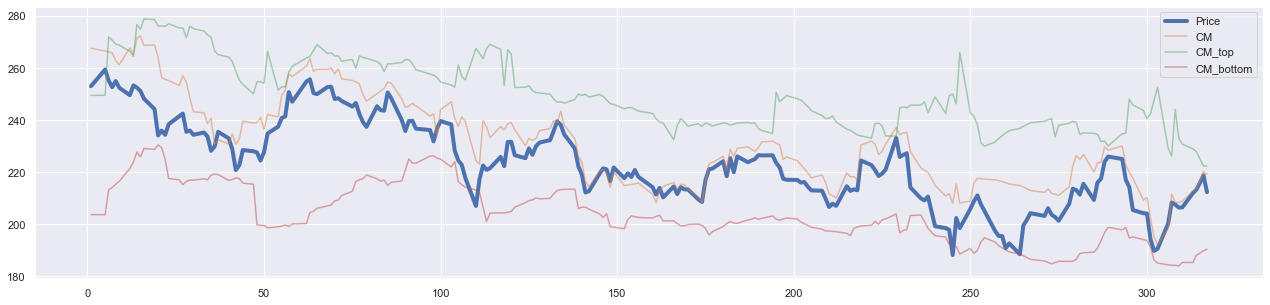

In [146]:
plt.figure(figsize=(22,5))
# sns.set(rc={'figure.figsize':(13,33)})
# sns.relplot(x="Days", y="Price", data=data, kind='line', alpha=0.4, legend='auto')
plt.plot(data.Days, data.Price, linewidth=4, label = 'Price')
plt.plot(data.Days, data.CM, alpha=0.5, label = 'CM')
plt.plot(data.Days, data.CM_top, alpha=0.5, label = 'CM_top')
plt.plot(data.Days, data.CM_bottom, alpha=0.5, label = 'CM_bottom')
plt.legend()






##Значение Price в зависимости от дня в месяце (с 1 по 31):

C:\Users\QWERTY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


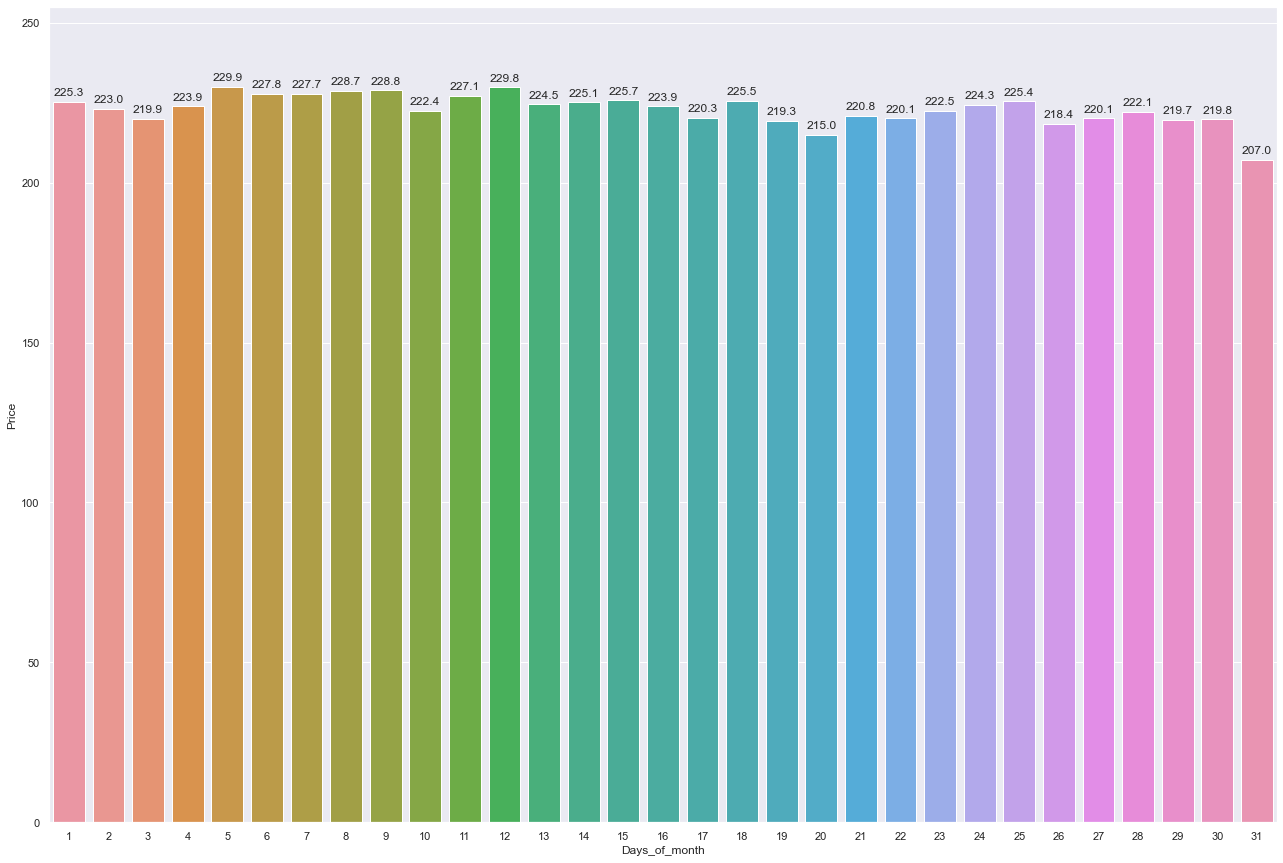

In [153]:
plt.figure(figsize=(22,15))
splot = sns.barplot('Days_of_month','Price', data=data, errwidth = 0)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')